In [1]:
from scipy.stats import norm
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import statistics

In [3]:
## Confidence interval (90%)
num_stdev = 3.29

## value = norm(loc = (*expected value*), scale = (*estimated range*)/conf_interval)
capital_cost = norm(loc = 300000/2, scale = (350000-250000)/num_stdev)
operating_cost = norm(loc = 1, scale = (1.20-0.80)/num_stdev)
production = norm(loc = 105000, scale = (120000-90000)/num_stdev)

## set number of simulations
num_simulations = 1000000

In [4]:
capital_cost_results = capital_cost.rvs(num_simulations)
operating_cost_results = operating_cost.rvs(num_simulations)
production_results = production.rvs(num_simulations)

In [5]:
data = pd.DataFrame({
    "capital_cost": capital_cost_results,
    "operating_cost": operating_cost_results,
    "production": production_results,
    "benefits": production_results * 1.75,
})

data.head()

,capital_cost,operating_cost,production,benefits
0,100354.153991,0.956831,118295.676933,207017.434632
1,148145.855489,1.065330,96653.405316,169143.459304
2,168981.249402,1.119601,93555.933044,163722.882828
3,140985.034785,0.940982,113619.731350,198834.529863
4,150076.931316,1.018527,107847.444917,188733.028605


In [6]:
data["net_profit"] = (data.benefits*2 - data.capital_cost - data.operating_cost*data.production*2)
data.head()

,capital_cost,operating_cost,production,benefits,net_profit
0,100354.153991,0.956831,118295.676933,207017.434632,87302.830359
1,148145.855489,1.065330,96653.405316,169143.459304,-15794.465140
2,168981.249402,1.119601,93555.933044,163722.882828,-51026.197739
3,140985.034785,0.940982,113619.731350,198834.529863,42855.840791
4,150076.931316,1.018527,107847.444917,188733.028605,7698.126594


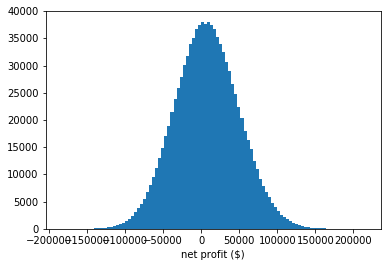

In [7]:
##plot distribution of outcomes

plt.hist(data.net_profit, bins=100)
plt.xlabel("net profit ($)")
plt.show()

In [8]:
##Standard Deviation
stdev = statistics.stdev(data.net_profit)
print(stdev)

42024.48290380463


In [9]:
##Mean
mean = statistics.mean(data.net_profit)
print(mean)

7525.136201964115


In [10]:
## Z-score of net zero
z_score = (mean)/stdev

##Probability of making money
print("The estimated probability of breaking even after 2 years: " + str(norm.cdf(z_score)))

The estimated probability of breaking even after 2 years: 0.5710568752534677


In [15]:
data.head()

,capital_cost,operating_cost,production,benefits,net_profit
0,92489.705718,0.975779,111818.576559,195682.508979,80654.808012
1,90546.711182,0.843312,110584.447097,193522.782419,109984.494417
2,71397.081450,0.862385,112616.194006,197078.339510,128522.485877
3,73266.629935,1.078298,102383.929884,179171.877298,64276.292388
4,137088.143993,0.892379,112113.699121,196198.973462,55213.995017
